In [2]:
%%capture
%run shared.ipynb

questioning_KID = JUST Kjonnsidentitet
questioning_Cis = JUST Cisness
questioning_gender = Kjønnsidentitet and/or Cisness
questioning_plus = JUST anyone who has SU in their orientation
questioning  = any or all of the above


```

NOTES FROM MIN:

DICTIONARY = the thing in squigly braces with colons. it is made up of:
    KEYS on the left of the colon (usually strings but can be anything hashable)
        hashable = things that can be turned into a number
        list = modifiable, tuple = not, so tuples are hashable and can be keys; lists are not and cannot
    VALUES on the right of the colon (can be literally anything)
    
It looks like this:
```

```python
dictionary_name = {
    "key" : value(s),
    "another_key" : more_value(s),
}
```
```
Dictionary of tuples (values look like (thing, other_thing, "thing", etc.))
Dictionary of dictionaries, the values can be variable names for other dictionaries (like making a dictionary of all my groups), or nested literals


- global namespace is the dictionary that when I type LG_df, what does that actually correspond to - how does it find the dataframe?

- 'get a handle on' - how to find the thing you want to change, find a method or a function that returns that thing so that you can modify or interact with it in some way

EXPRESSION = a bunch of symbols that has a result, calling a function can be an expression 
             what you put inside brackets is an expression, whose result is always a series
             one expression can have many terms
             you can always store the result of an expression in a variable
             rather than having df[big complicated expression]
             variable = whatever you had in brackets
             df[variable]

ARRAY = a sequence of things, a special list

INDEX = the thing (number or string) you use to look up items in a container ("indexing into an array" = the position in the array, 0 = the one at the beginning)

SERIES = the main thing that distinguishes a series from an array is that a series has a customizable index
         is two arrays, kind of like a dictionary - the arrays are the index and the values
         a column is a series - the index is like a row ID, the actual contents of the column are the values
         if you do something like sorting or slicing it maintains the relationship between the index & value
         a dataframe is just a collection of series that have the same index (that's why nans are there)
         when you do arethmetic or something on a series, it usually means doing that operation element-wise (for each value, 
         do the thing)
             
             orientation == bi - actually doing that operation on every item in the values, returning a new series with the 
             same index where the values are the result of whatever operation you did
                         
         df["Hyppighet_n"] = df.Hyppighet.apply(Hyppighet_map.get)
            In the order that it gets 'done':
              - get the dataframe called df
              - .Hyppighet = look up the column called Hyppighet (now we have a series)
              - .apply() is a method on series that says call this function and return a new series where each item in the 
              series is the result of calling that function on each item in the hyppighet series 
              - .get is getting an item out of a dictionary
              - df["Hyppighet_n"] = store the resulting series in a new column with this name same kind of things .isin() or 
              .str.contains() or == or > (all booleans that return true/false)
         
THING[OTHERTHING] = "get item" (or "set item" if it's on the left side of an equals sign)
    - how you get things out of a container of things (like a list or a tuple or a dataframe or a dictionary)
    - In Pandas, if you treat it like a dictionary and give it a string, that will return a column. If you give it a 'mask' 
        it will return a new dataframe or series (if you give a series a mask you get a series back, df get df back) where 
        that mask is true
    - with things like arrays and dataframes, one of the things you can pass to get item is a 'mask'

MASK: series of booleans (true/false) that has the same index as the dataframe or series (columns are series, series are not necessarily columns) you can mask a series or a dataframe, masking a dataframe is the same as masking all the series at once

df[df.column_name] or df[df.column_name == "something"] or df[df.column_name.isin("something")] 
Different examples of applying one mask
saying give me the subset (rows) where this mask is true - what you need to do when you are f.eks. creating a group

or 'if this is true or this is true...' - combining a bunch of masks into one mask:
df[df.column_name == "something" | df.column_name.isin("something")]

inside the brackets is a mask - there are lots of ways to make a mask, any series of operations - the result of whatever you put together is a series of booleans with an index that matches the thing you are trying to mask

.dropna() changes the index because it's applying a mask - series.isna() = a series
if you use dropna inside your filter, you have to also do it outside (filter and mask are the same thing)

creating a mask vs. applying a mask
.isna() creates a mask
.dropna() applies the inverse of that mask is equivalent to df[~df.isna()]


When you have df[mask] you're changing the index (picking a subset) to be the items where the mask is true
when do you apply the mask? "apply the mask" means another_df = df[mask] or another_series = series[mask]
never use len on the mask (doesn't provide information, creating a mask doesn't change the length - always has one value for every row)
if you're interested in the values of the same column or another column where the mask is true, that's when you apply the mask 


Kira's way: use brackets when applying a mask, no brackets means making it but not applying it

Min's way: *shakes head in disappointment*
Step 1: Creating the mask (big boolean expession that usually starts with df.) is saying find where these things are true
Step 2: Give me the subset of rows where it was true in a way that I can interact with it (apply the mask in order to get that subset of another column)
With a mask, there's only one question you can answer - for how many rows is this condition true (or false) mask.value_counts() or sum(mask)
If you want to answer other questions about a group for which those things are true, then apply the mask (which creates a new df or series) and store it as a new variable so you can work with it


.isin("T", "OT") = value of the column is exactly one of the items in the list (identical to a chained == "T" or == "OT" with separate parentheses for each). 
.str.contains("T") will get T, Thing, Thingy, etc. = that substring appears anywhere in the column. 
````

In [4]:
*df*?

KH_compare_df
LGBTQIA_df
LGBTQIA_norsk_df
LG_df
Skeiv_ID_df
bib_compare2_df
bib_compare3_df
bib_compare_df
bruk_df
ch_age_df
ch_df
ch_region_df
ch_urban_groups_df
chcsts_df
cis_region_df
cishet_skeive_df
cisness_df
cs_urban_groups_df
df
exclusive_orientation_df
gender_df
gender_stuff_df
intersectional_groups_df
mwct_df
n_orientations_df
overall_df
s_age_df
s_region_df
s_urban_groups_df
synlighet_df
tnb_region_df
tnb_urban_groups_df

In [5]:
#pd.set_option('max_rows', None)

In [6]:
#Show all the columns and rows
#pd.options.display.max_columns = None
#pd.options.display.max_rows = None

#all column names
list(df.columns)

['Unnamed: 0',
 'NR',
 'Malgruppe',
 'Alder',
 'Region',
 'Kjonnsidentitet',
 'KID_egne_ord',
 'Cis',
 'Spesifiser_Cis',
 'Pronomener',
 'Intersex',
 'Seksuell_orientering_1',
 'Seksuell_orientering_2',
 'Seksuell_orientering_3',
 'Seksuell_orientering_4',
 'Seksuell_orientering_5',
 'Seksuell_orientering_6',
 'Seksuell_orientering_7',
 'Seksuell_orientering_8',
 'SO_egne_ord',
 'Annen_RO',
 'RO_1',
 'RO_2',
 'RO_3',
 'RO_4',
 'RO_5',
 'RO_6',
 'RO_7',
 'RO_8',
 'RO_egne_ord',
 'Synlig_Skeiv_1',
 'Synlig_Skeiv_2',
 'Synlig_Skeiv_3',
 'Synlig_Skeiv_4',
 'Synlig_Skeiv_5',
 'Skeiv_ID',
 'Marginalisert_ident',
 'Spesifiser_marg_ident',
 'Sist_besok',
 'Hyppighet',
 'Urban',
 'Deichman',
 'Valgt_andre_bib',
 'UV',
 'UBU',
 'Andre_temaer',
 'Arr',
 'utlan',
 'bla_i',
 'datamaskin',
 'still_spm',
 'utrygt',
 'm_med_respekt',
 'feilkjonnet',
 'antatt_orientering',
 'Interaksjon_bibansatt_1',
 'Interaksjon_bibansatt_2',
 'Interaksjon_bibansatt_3',
 'Interaksjon_bibansatt_4',
 'Interaksjon_bruke

In [7]:
#Format decimal as percentage:

queer_frac = (sum(df.Seksuell_orientering.str.contains("Q"))/len(alle_skeive))

print("{:.1%}".format(queer_frac))
#or
print (f"{queer_frac:.1%}")

41.1%
41.1%


In [8]:
#Make new categories
bibliotekarer = df[df.survey =="Bibliotekarer"]
cishet_bibliotekarer = df[(df.survey =="Bibliotekarer") & (~df.Skeiv)]
skeive_bibliotekarer = df[(df.survey =="Bibliotekarer") & (df.Skeiv)]
print(len(skeive_bibliotekarer))

ace_plus = df[df.Seksuell_orientering.str.contains("Ace")|df.RO.str.contains("Aro")]
len(ace_plus)

12


90

In [9]:
#x_groups is a dictionary, and the strings are the keys, and the dataframes (LG, gay, etc.) are the values. 
#You can get one of the values by asking for one of the keys, so if you type x_groups["X"] the you will get the gay dataframe.

#Make them into a group df


<AxesSubplot:>

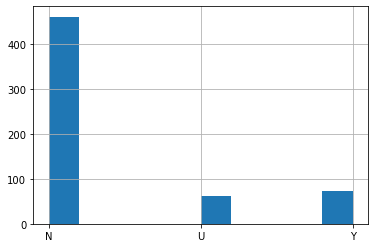

In [10]:
cisness_df["feilkjonnet"].hist()

1     279
2     217
3      71
4      26
5      19
6      19
8       5
7       4
10      1
14      1
Name: Orienteringer, dtype: int64

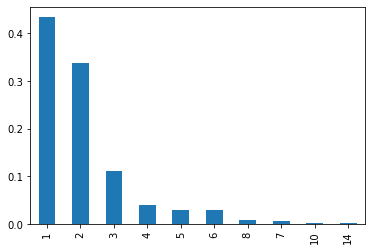

In [11]:
alle_skeive.Orienteringer.str.strip(",").str.split(",").apply(len).value_counts(normalize=True).plot(kind='bar')
alle_skeive.Orienteringer.str.strip(",").str.split(",").apply(len).value_counts()
#alle_skeive.Orienteringer.unique()

In [12]:
#Drops all 'neutral' responses from those who did not change the pre-set neutral on ANY questions (N=12)

# columns = ["Utvalg_KID", "Utvalg_Orientering", "Utvalg_Intersex", "Utvalg_lykkelig", "Utvalg_fag", "Aldri_tenkt", "Utrygt_stille_spm", "Rep_matters_B", "Bib_pleier_ha", "Alltid_velkommen", "Trygge_rom_gen_B", "Ingen_rolle", "Ingenting_tilby", "Bibs_ansvar", "Minoritetsstress_ansatte", "Minoritetsstress_brukere", "Lhbtiq_vennlig", "Rom_for_forbedring", "Andre_brukere", "Helt_meg_selv"]
# non_participants = True
# for column in columns:
#     non_participants &= df[column] == 0

# df.loc[non_participants, columns] = pd.NA

In [13]:
for key in gender_keys.keys():
    print_info_by_gender(key, column="Forklare_SIAN_B_U")
    print()

KeyError: 'Forklare_SIAN_B_U'

In [ ]:
sum(s_women.Avrunding_B.isna())/len(s_women)

In [ ]:
#Show non-captured entries (those with more than one orientation selected) by creating a union of all group indices and locate all rows not in that index
noncaptured = df[~df.NR.isin(exclusive_orientation_df.NR)]
#noncaptured.loc[noncaptured.Orienteringer == "Het,", ["RO", "Seksuell_orientering", "Kjonnsidentitet"]]
#noncaptured.Orienteringer.value_counts()